In [1]:
%pylab inline
from sci378 import *
from pyndamics3 import Simulation
from pyndamics3.fit import fit, Parameter

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.17
pyndamics3  version  0.0.28


# Novick A

In [2]:
novickA=pd.read_csv('C:/Users/student/Downloads/g149novickA.txt',header=None)
novickA.columns=['t','z']
novickA.head()

,t,z
0,0.1699,0.0190
1,0.4426,0.0855
2,0.5111,0.1164
3,0.7156,0.1639
4,1.0564,0.2470


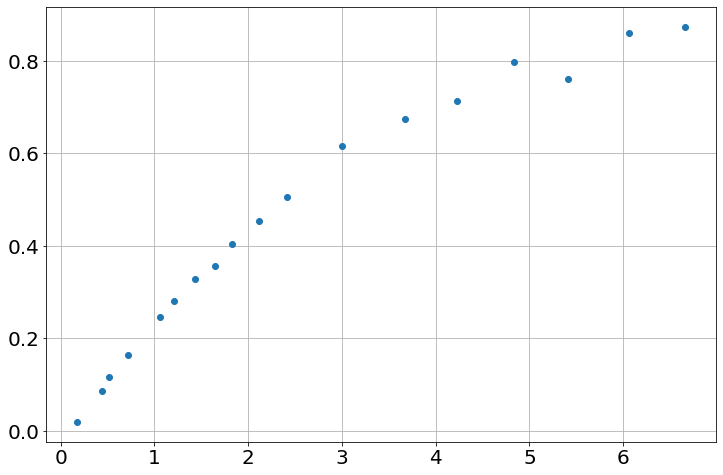

In [3]:
t_data=novickA['t']
y_data=novickA['z']
plot(t_data,y_data,'o')

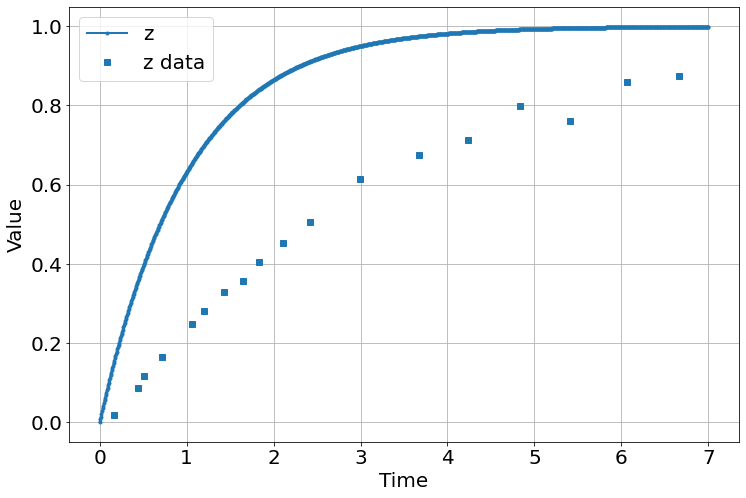

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("z'=S/T - z/T",0,plot=True)
sim.params(S=1,T=1)
sim.add_data(t=novickA['t'],z=novickA['z'],plot=True)
sim.run(7)

In [5]:
sim=Simulation()
sim.add("z'=S/T - z/T",0,plot=False)
sim.add("S'=a*(K-S)",1,plot=False)
sim.params(a=1,T=1,K=1)
sim.add_data(t=novickA['t'],z=novickA['z'],plot=False)
sim.run(7)

In [6]:
results=fit(sim,
           Parameter("a",value=1),
           Parameter("T",value=1),
           Parameter("K",value=1))
results

In [7]:
sim.run(7)

In [8]:
t1=sim.t
z1=sim.z

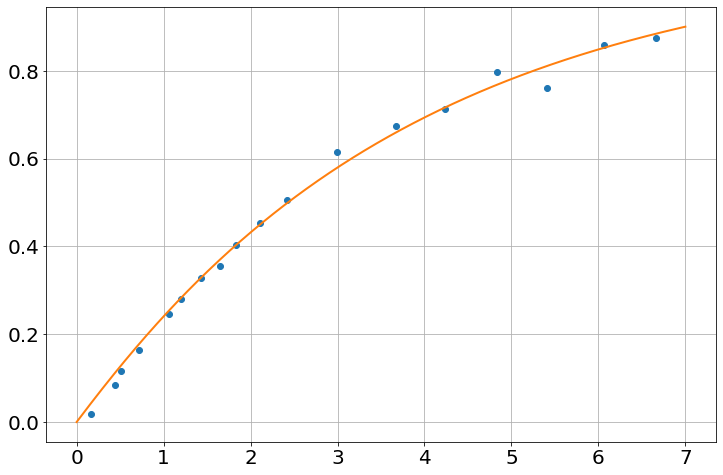

In [9]:
plot(t_data,y_data,'o')
plot(t1,z1)

In [10]:
sim=Simulation()
sim.add("z' = S/T - z/T",0,plot=False)
sim.add("S' = a*(k-S)",0,plot=False)
sim.params(a=1,k=30,T=1)
sim.add_data(t=t_data,z=y_data,plot=False)
sim.run(7)

In [11]:
results=fit(sim,
           Parameter("a",value=1,min=0),
           Parameter("k",value=1,min=0),
           Parameter("T",value=1,min=0),
           )

In [12]:
t2=sim.t
z2=sim.z

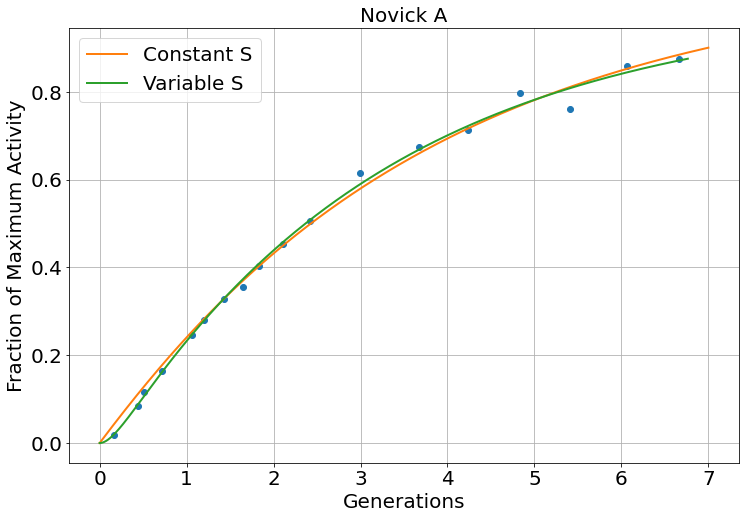

In [13]:
plot(t_data,y_data,'o')
plot(t1,z1,label=f'Constant S')
plot(t2,z2,label=f'Variable S')

xlabel('Generations')
ylabel('Fraction of Maximum Activity')
title('Novick A')
legend()
savefig('NovickA.pdf', dpi=300,bbox_inches='tight')

# Novick B

In [14]:
novickB=pd.read_csv('C:/Users/student/Downloads/g149novickB.txt',header=None)
novickB.columns=['t','z']
novickB.head()

,t,z
0,2.3832,0.010900
1,2.7230,0.009343
2,3.0358,0.014600
3,3.5177,0.014500
4,4.0014,0.024200


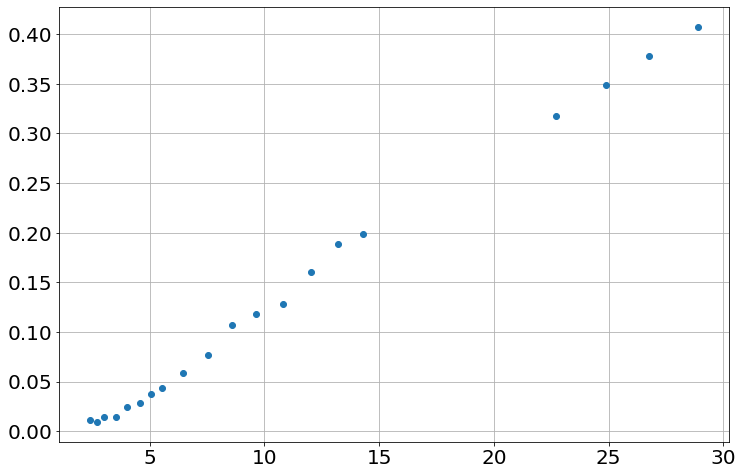

In [15]:
t_data=novickB['t']
y_data=novickB['z']
plot(t_data,y_data,'o')

### t1, z1

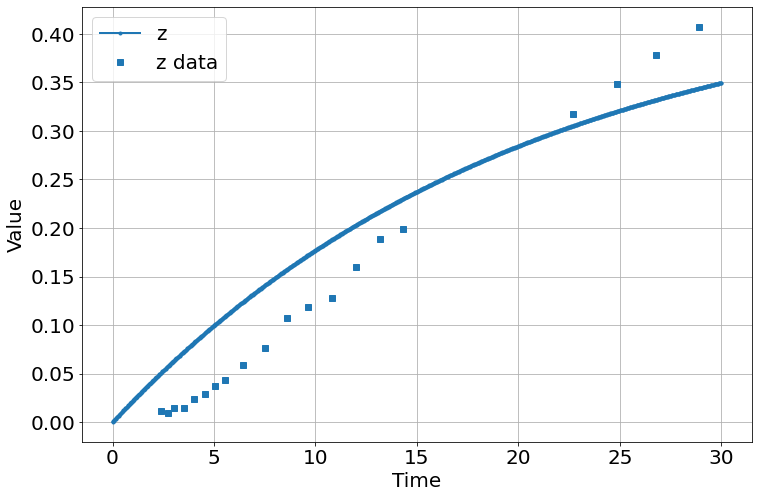

<Figure size 864x576 with 0 Axes>

In [16]:
sim=Simulation()
sim.add("z'=S/T - z/T",0,plot=True)
sim.params(S=0.45,T=20)
sim.add_data(t=novickB['t'],z=novickB['z'],plot=True)
sim.run(30)

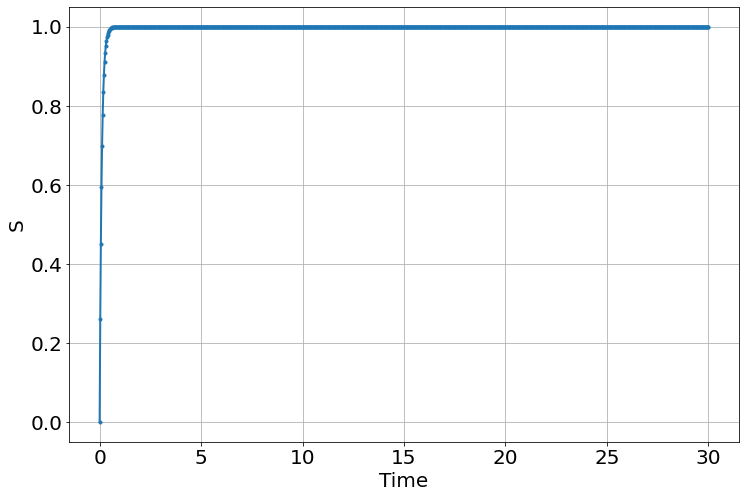

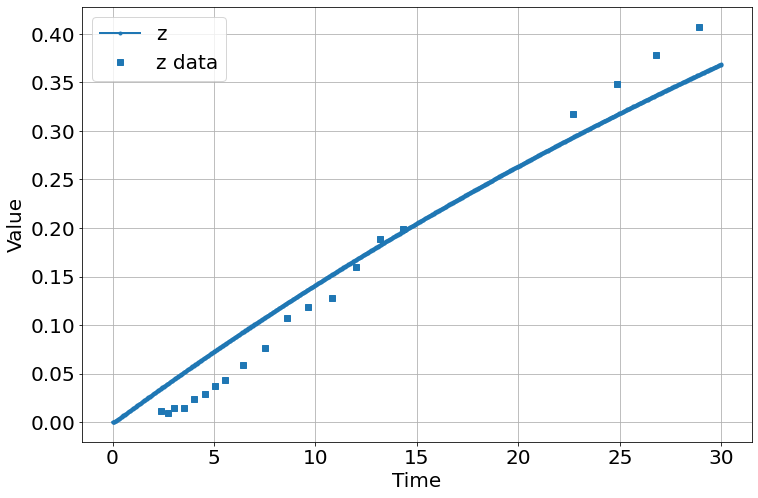

<Figure size 864x576 with 0 Axes>

In [17]:
sim=Simulation()
sim.add("z'=S/T - z/T",0,plot=True)
sim.add("S'=a*(K-S)",0,plot=True)
sim.params(a=10,T=65,K=1)
sim.add_data(t=novickB['t'],z=novickB['z'],plot=True)
sim.run(30)

In [18]:
results=fit(sim,
           Parameter("a",value=1,min=0),
           Parameter("T",value=1,min=45,max=75),
           Parameter("K",value=1,min=0,max=2))
results

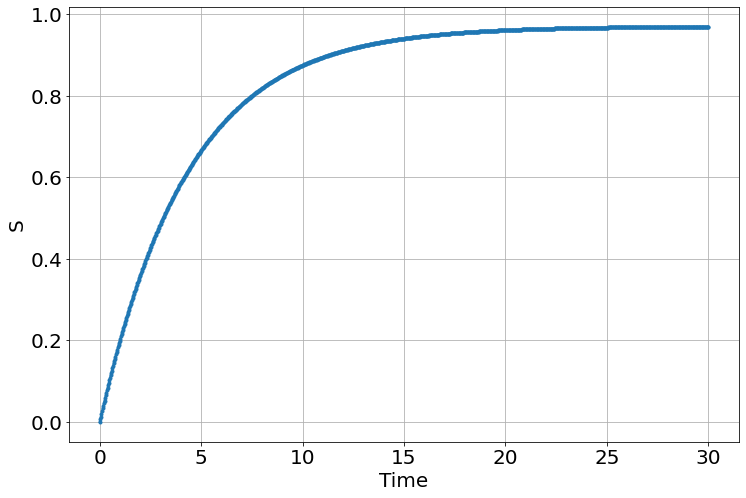

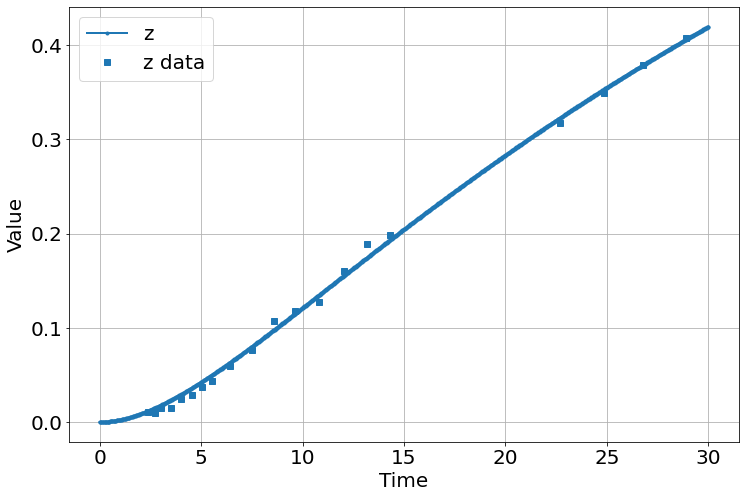

<Figure size 864x576 with 0 Axes>

In [19]:
sim.run(30)

In [20]:
t1=sim.t
z1=sim.z

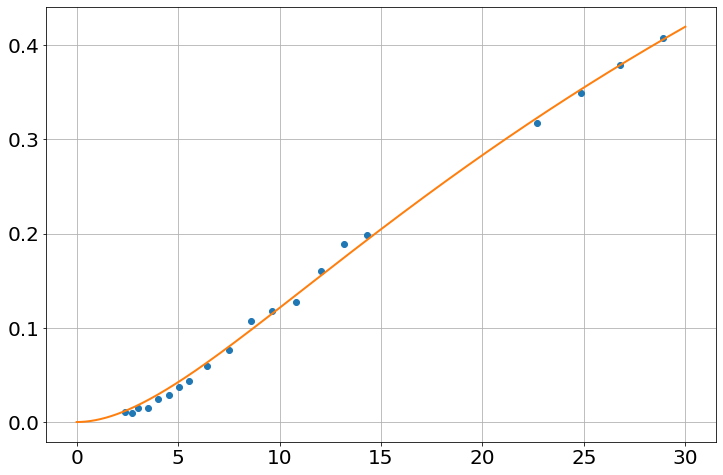

In [21]:
plot(t_data,y_data,'o')
plot(t1,z1)

### t2, z2

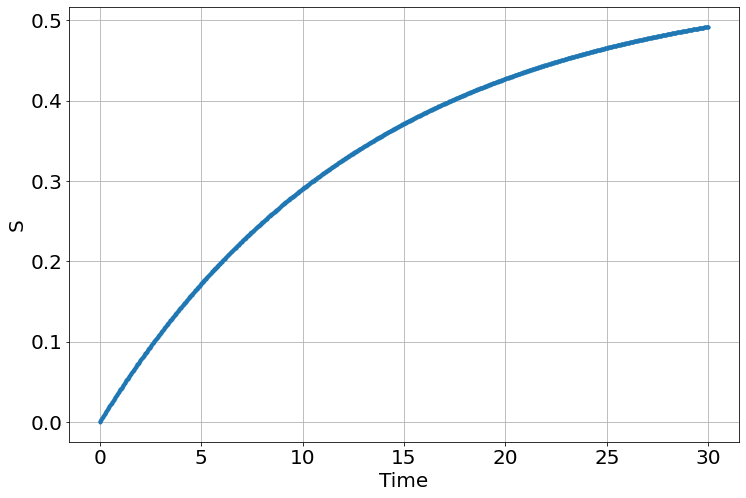

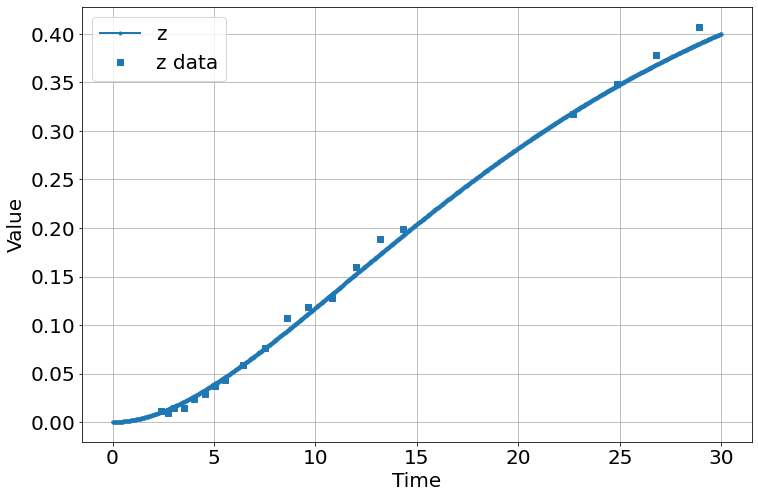

<Figure size 864x576 with 0 Axes>

In [22]:
sim=Simulation()
sim.add("z' = S/T - z/T",0,plot=True)
sim.add("S' = a*(k-S)",0,plot=True)
sim.params(a=0.075,k=0.55,T=10)
sim.add_data(t=t_data,z=y_data,plot=True)
sim.run(30)
# k = height

In [23]:
results=fit(sim,
           Parameter("a",value=1,min=0.075,max=0.07500001),
           Parameter("k",value=1,min=0.55,max=0.550000001),
           Parameter("T",value=1,min=10,max=10.000001),
           )
results

In [24]:
t2=sim.t
z2=sim.z

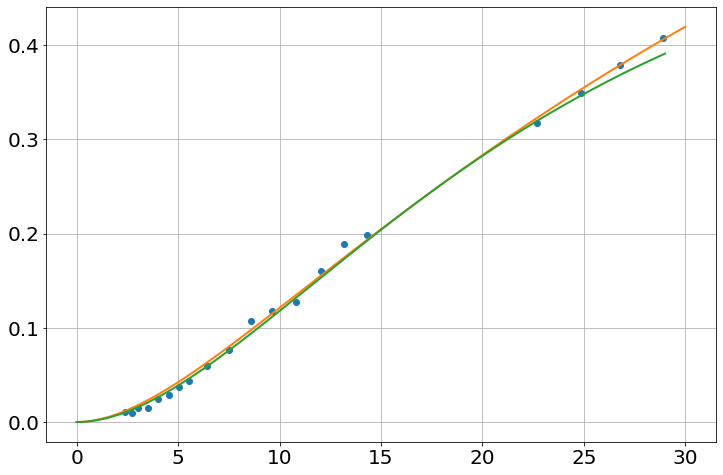

In [25]:
plot(t_data,y_data,'o')
plot(t1,z1)
plot(t2,z2)

## t3, z3

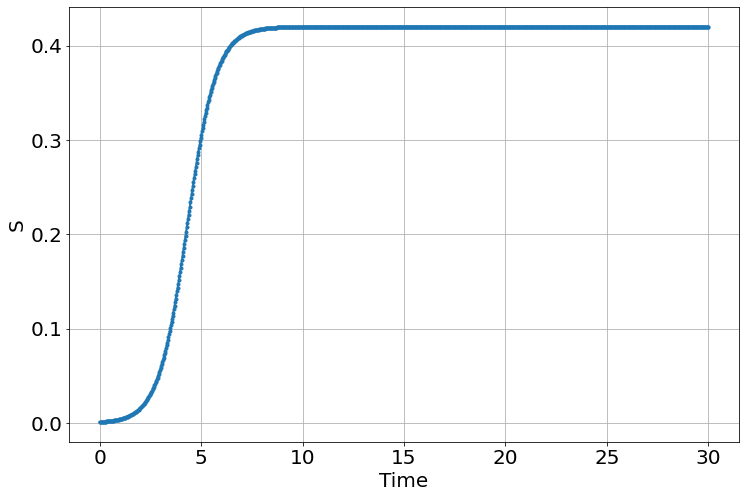

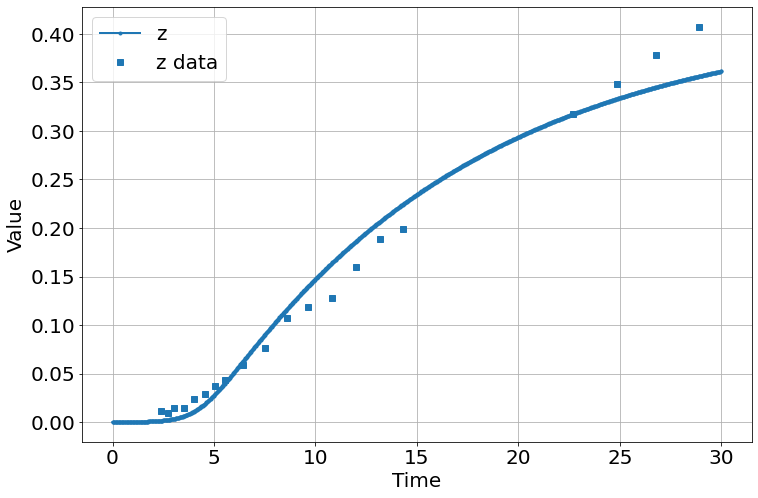

<Figure size 864x576 with 0 Axes>

In [26]:
sim=Simulation()
sim.add("z' = S/T - z/T",0,plot=True)
sim.add("S' = a*S*(1-S/k)",0.001,plot=True)
sim.params(a=1.4,k=0.42,T=13)
sim.add_data(t=t_data,z=y_data,plot=True)
sim.run(30)

In [27]:
results=fit(sim,
           Parameter("a",value=1,min=1.35,max=1.45),
           Parameter("k",value=1,min=0.4,max=0.45),
           Parameter("T",value=1,min=12,max=14),
           )
results

In [28]:
t3=sim.t
z3=sim.z

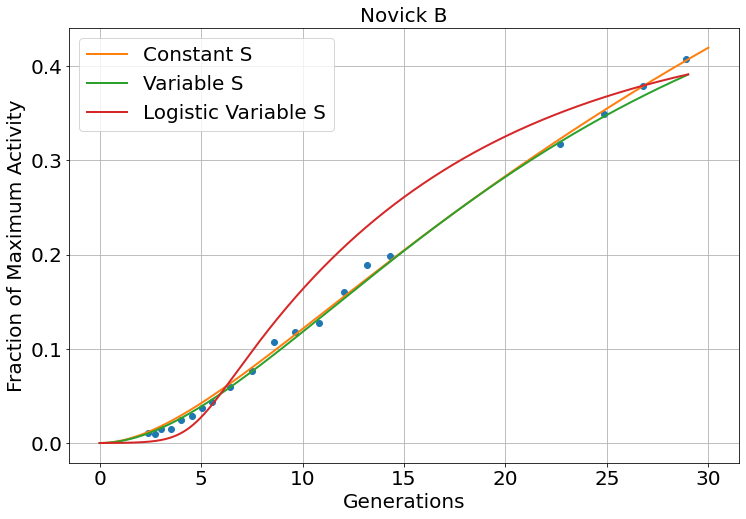

In [29]:
plot(t_data,y_data,'o')
plot(t1,z1,label=f'Constant S')
plot(t2,z2,label=f'Variable S')
plot(t3,z3,label=f'Logistic Variable S')

xlabel('Generations')
ylabel('Fraction of Maximum Activity')
title('Novick B')
legend()
savefig('NovickB.pdf', dpi=300,bbox_inches='tight')